pip install visualkeras

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 25.9 MB/s 


In [ ]:
# getting started with the model 
# importing required libraries/packages 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.9.2
Keras version: 2.9.0


In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


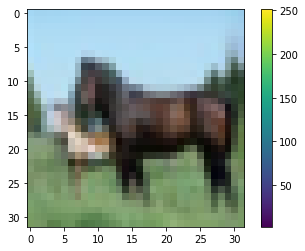

In [ ]:
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()

In [ ]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

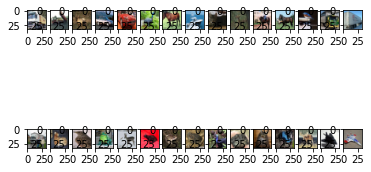

In [ ]:
# Visualizing the data 
for i in range(1,31):
  plt.subplot(2, 15, i)
  plt.imshow(X_train[i])

In [ ]:
# # detect and init the TPU
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# # instantiate a distribution strategy
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# with tpu_strategy.scope():
    # Base Model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [ ]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

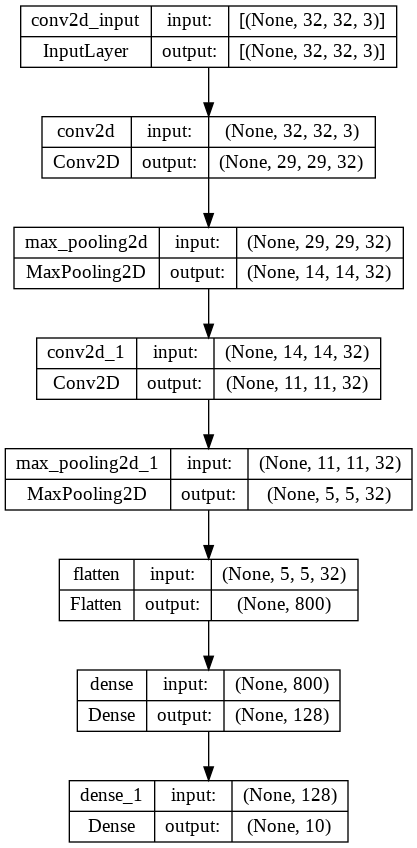

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

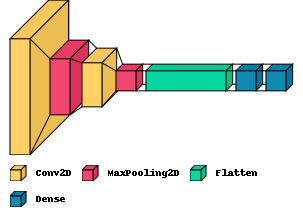

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 2.1492 - accuracy: 0.6533
Test Accuracy of Base Model: 0.6532999873161316


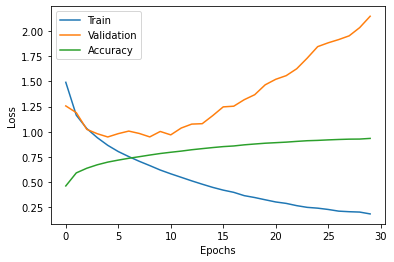

In [ ]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history)

In [ ]:
# Model_1 with Dropouts
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5)) 
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_1.summary()
history_1 = model_1.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

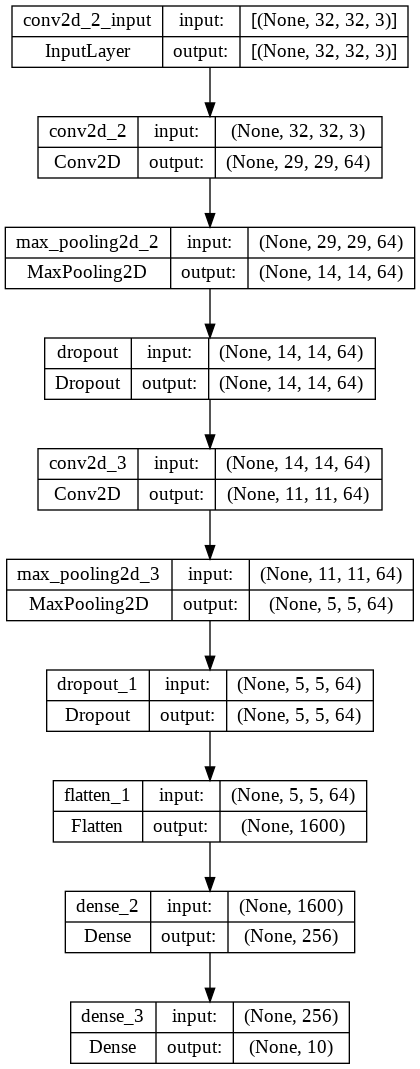

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

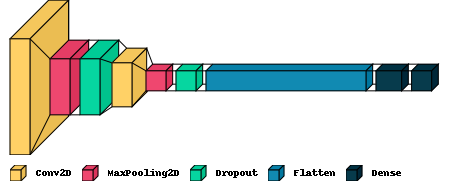

In [ ]:
visualkeras.layered_view(model_1, legend=True)

In [ ]:
evaluation = model_1.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.0742 - accuracy: 0.7097
Test Accuracy of Model_1(with Dropouts): 0.7096999883651733


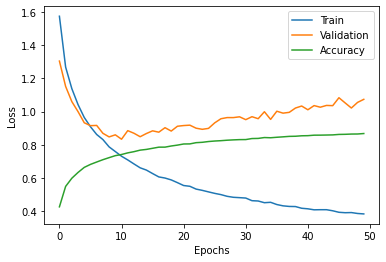

In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_1)

In [ ]:
# Model_2 with more filters
model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4)) 
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(units =10  , activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 100, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         262272    
                                                      

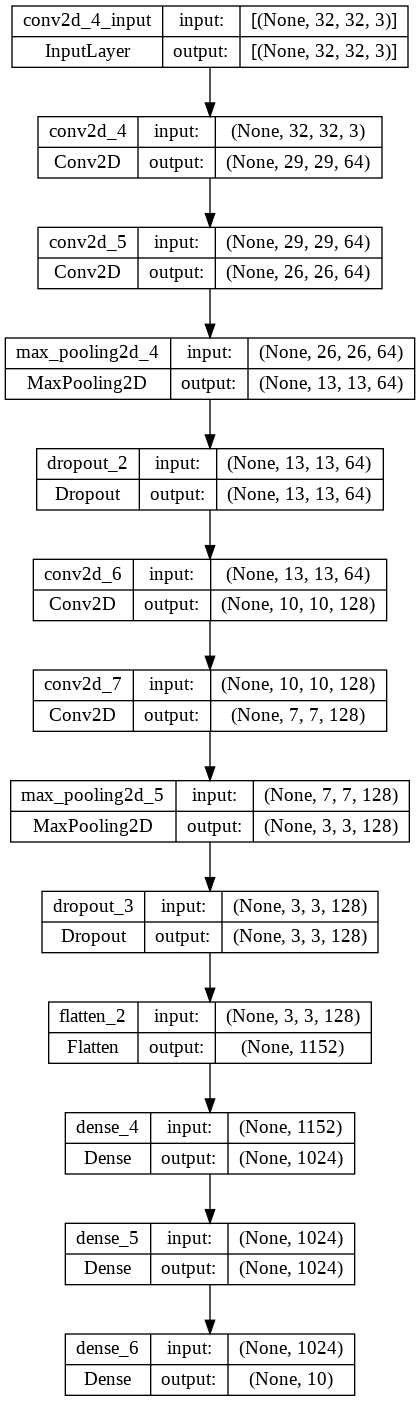

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

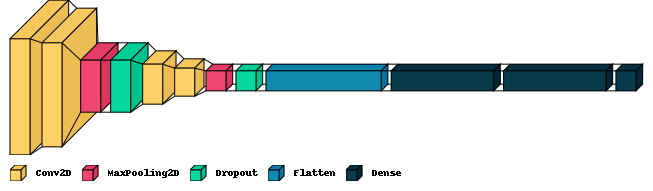

In [ ]:
visualkeras.layered_view(model_2, legend=True)

In [ ]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.8954 - accuracy: 0.7440
Test Accuracy of Model_2(with more  filters): 0.7440000176429749


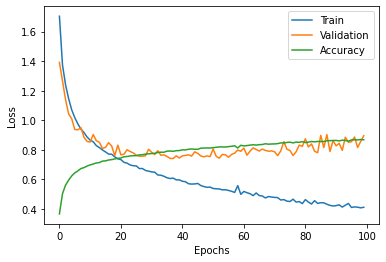

In [ ]:
def plotloss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_2)

In [ ]:
# Model_3 with Batch Normalization
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 100, verbose = 1, validation_data = (X_test, Y_test_en))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

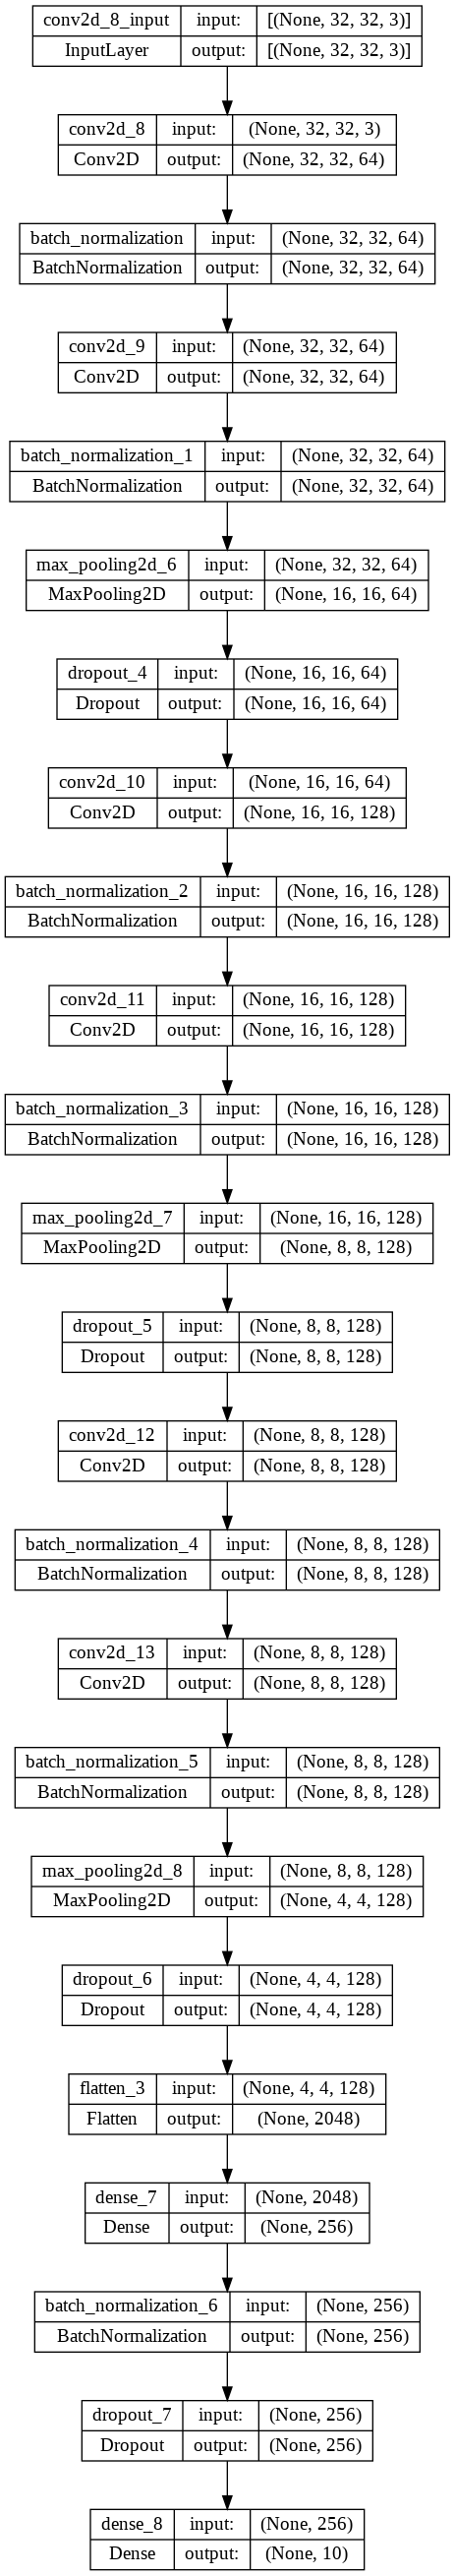

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

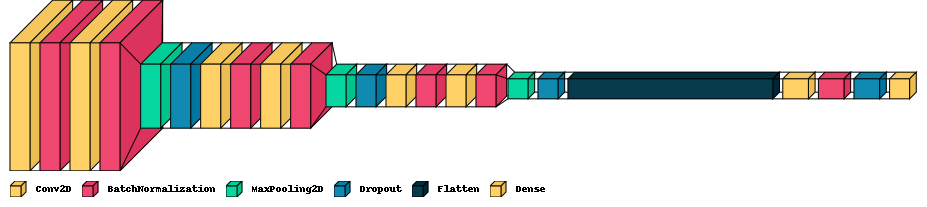

In [ ]:
visualkeras.layered_view(model_3, legend=True)

In [ ]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.6336 - accuracy: 0.8774
Test Accuracy of Model_3 (with Batch Normalization): 0.8773999810218811


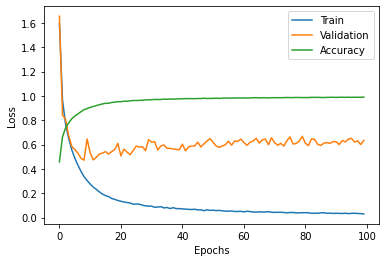

In [ ]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_3)